### Comments
***This problem can be solved using merge sort***

* Initially I started with this solution 

```
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head

        nodes = []

        node = head

        while node:
            nodes.append(node)
            node = node.next

        nodes.sort(key=lambda x: -x.val)

        prev = None
        for n in nodes:
            n.next = prev
            prev = n

        return nodes[-1]
```

* Which worked in nlog(n) time with only extra space for the array wrapper since the nodes are objects.
* Howerver the question asks to solve the issue with time and space complexity of O(nlog(n)) and O(1)


* This is where bottom up merge sort can be implmented. This is done in 3 parts:
  * Divider function. In this case fast and slow pointer implmentaion.
  * Merge function that sorts both sides. 
  * Driver function to execute both divide and merge.

### Complexity:

***Time***:

***Space***: 

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:

    def divide(self, node):
        s, f = node, node
        prev = None
        while f and f.next:
            prev = s
            s = s.next
            f = f.next.next
        if prev:
            prev.next = None
        return [node, s]

    def merge(self, n1, n2):
        result = ListNode()
        merged = result
        while n1 and n2:
            val1 = n1.val
            val2 = n2.val

            node = None
            if n1.val > n2.val:
                node = n2
                n2 = n2.next
            else:
                node = n1
                n1 = n1.next

            merged.next = node
            merged = node

        while n1:
            merged.next = n1
            merged = n1
            n1 = n1.next
        while n2:
            merged.next = n2
            merged = n2
            n2 = n2.next

        return result.next

    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or head.next == None:
            return head

        [left, right] = self.divide(head)

        if left.next:
            left = self.sortList(left)
        if right.next:
            right = self.sortList(right)
        ans = self.merge(left, right)
        return ans


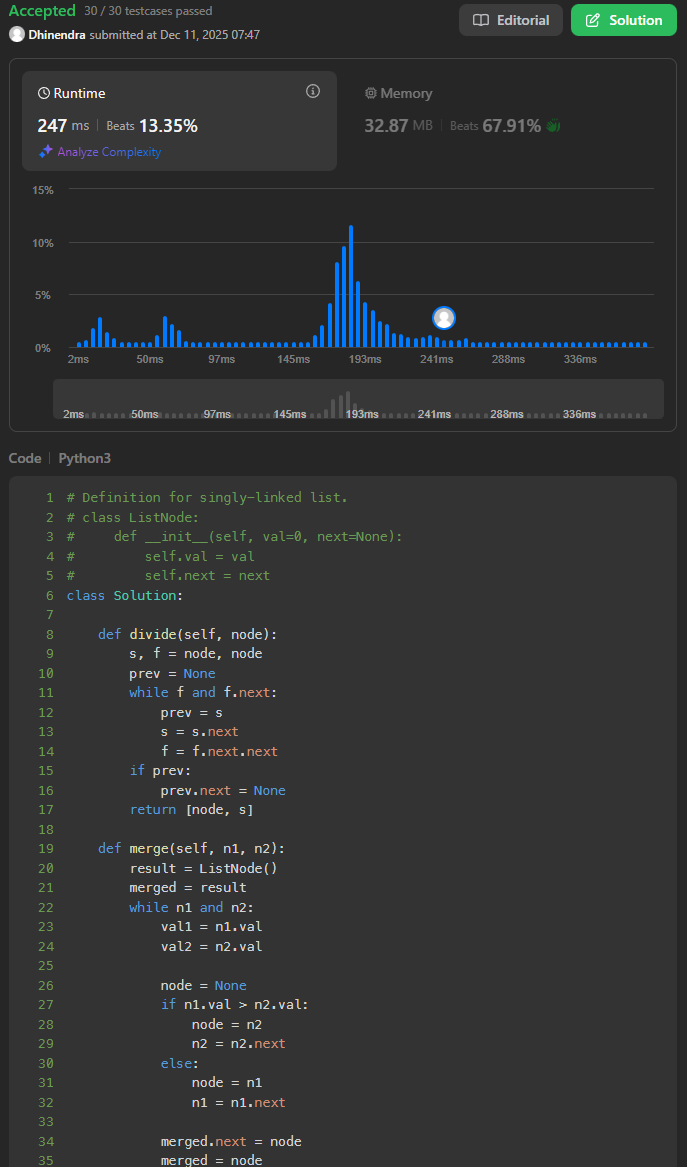

### Community References:

* Merge sort can be done both bottom up and top down with the same time complexity but different space complexity. Top down takes O(log(n)) and bottom up takes O(1)
* As you can see we dont split the list into single parts instead make sort in place leading to a stack size of log(n)
```
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # If the head or the entire list is none, return the head
        if not head or not head.next:
            return head
        # Get the middle node
        mid = self.getMid(head)
        # Split the list to left and right and sort them
        left = self.sortList(head)
        right = self.sortList(mid)
        # Merge the sorted lists
        return self.merge(left, right)

    def merge(
        self, list1: Optional[ListNode], list2: Optional[ListNode]
    ) -> Optional[ListNode]:
        dummyHead = ListNode(0)
        tail = dummyHead
        while list1 and list2:
            if list1.val < list2.val:
                tail.next = list1
                list1 = list1.next
            else:
                tail.next = list2
                list2 = list2.next
            tail = tail.next
        tail.next = list1 if list1 else list2
        return dummyHead.next

    def getMid(self, head: Optional[ListNode]) -> Optional[ListNode]:
        midPrev = None
        while head and head.next:
            midPrev = head if not midPrev else midPrev.next
            head = head.next.next
        mid = midPrev.next
        midPrev.next = None
        return mid
```